# Week 1: Introduction and background

## About these notes

These notes are _not_ a replacement for the (excellent) textbook. They correspond roughly to the content of my lectures, but also include pointers to readings in the textbook, which usually go into a lot more detail. Unless marked optional, you're responsible for both the notes as well as any readings/videos that they point to.

There is one notebook for each week of the course. Please read the section titled "Tuesday" **before** Tuesday's class, and the section "Thursday" **before** Thursday's class. In class, I will take questions about the readings and then we will often jump right in to doing example problems.

# Tuesday

<div class="alert alert-info">
    <p><b>Read</b> 0.1, which is an overview of the whole course.</p>
    <p><b>Watch</b> W1E1: Welcome</p>
</div>

Welcome to *Theory of Computing*! 

I'd like to introduce the course with a game called Poco. Please visit [https://bit.ly/pocogame](https://bit.ly/pocogame) and play a few levels. Then, think about: how would you make a computer play this game perfectly? If a puzzle has a solution, the computer must find it, but if a puzzle has no solution, the computer must click the "give up" button.

If you tried to write a program to do this, you would find that it's extremely difficult (particularly, how to make the computer decide to give up). You might suspect that it's impossible, but how would you know for sure? And maybe it's not possible now, but might it be possible in a more powerful programming language, or on more powerful hardware, perhaps hardware that hasn't been invented yet?

To give a definite answer to this question, we need three ingredients. These ingredients will be part of everything we do in this course. 

First, we need a **model of computation**, a definition of what a computer is and does.

Second, we need to define our **computational problem**, in this case, "playing Poco perfectly," in a precise way.

Third, we need to **prove a relationship** between models of computation and/or computational problems: in this case, that it's either possible or impossible to make a computer play Poco perfectly.

## Computation

What is a computer? Most of you are juniors in computer science, and by the end of this year, we hope you'll understand, from bottom to top, how a C/C++/Python program running on Linux running on x86/ARM/MIPS works. But we want your computer science degree to be good for a lifetime. In 50 years, what kinds of computers will you be programming, building, or even inventing? In this course, we want to teach you what we believe to be true, not just about a particular kind of computer, but about all computers, past, present, and future.

To do this, we need to look to the beginning. Historically, the answer to this question came from a totally different direction, from people asking not "what is a computer," but "what does it mean to compute?" For in 1936, everyone knew what a computer was. A printer is a person who prints; a dishwasher is a person who washes dishes; and a computer is a person who computes. For example, when you do arithmetic or solve a system of linear equations or find a derivative, you're computing -- you're following an algorithm that you learned in school. But some math requires more ingenuity, like writing proofs. In the early 20th century, mathematicians were starting to wonder whether there was an "effective procedure" (we would say, an algorithm) for writing proofs too.

In 1936, Turing published the paper that many consider to be the founding document of computer science. His answer to the question about what was meant by an "effective procedure" was not the first, but it was the most convincing. He imagined a computing person with access to an unlimited supply of paper, argued convincingly for various simplifying assumptions about how he/she computes, and finally imagined a machine (which he called an a-machine, but which we now call a Turing machine) that would do the same thing automatically. 

Although Turing machines were invented just as a mathematical construct, they are important for computer science because all current computers (under some reasonable assumptions) can be emulated by a Turing machine. We will further argue that even computers of the future can be emulated by Turing machines. If you accept these arguments, then Turing machines serve as our definition of what a computer is: if something can be done on a computer, it can be done on a Turing machine; if something cannot be done on a Turing machine, it cannot be done on any other computer.

Under this definition, we'll be able to prove that there are problems that *no* Turing machine can solve, and therefore that no program written for any current or future computer can solve. Automatically solving "Poco" (more commonly known as the [Post Correspondence Problem]) is one of these.

[Post Correspondence Problem]: https://en.wikipedia.org/wiki/Post_correspondence_problem

Before we get there in Unit III, we will study several simpler models of computation in Units I and II. You're probably familiar with two of them already: deterministic finite automata (also known as finite state machines) and regular expressions. And in Unit IV, we will continue to study Turing machines, but we'll restrict them to use only a polynomial amount of time.

## Problems

The second ingredient is that we need a way of talking about computational problems. It would seem that there are so many different kinds of things that computers could do, that we have to study each kind separately. But maybe we can reduce them all to one kind of problem, and focus our study on that one kind of problem. Namely, we want to treat every kind of object as a **string of symbols** (e.g., bits), and we want to treat every kind of computational problem as a **yes/no question about strings**.

People are fairly comfortable these days with the idea that any kind of object we might want to compute about can be represented as a string. We deal every day with messages, music, pictures, movies, books, etc., in digital form, with the awareness that these are just strings of 0’s and 1’s.

Less obvious, perhaps, is that it makes sense to reduce all kinds of computations down to yes/no questions about strings. There are a number of objections that could be raised and which we can discuss in class, but to me the most glaring one is that the output from a computer program is much more than just a "yes" or "no" answer. For example, suppose we want a program that looks at a chess board `b` and outputs the best next move -- that's not a yes/no question. But suppose further that we can write a function `is_best_move` that takes a chess board, a possible next move `m`, and returns "yes" if `m` is the best move and "no" otherwise. Then we can write a function

    def find_best_move(board):
        for all possible moves m:
            if is_best_move(board, m):
                return m

Since it's possible to implement any function as a wrapper around a function that returns yes/no, it's sufficient, for pretty much the rest of the course, to only think about computations that result in a yes/no answer. (Caveat: Implementing a function this way can be *much slower* than implementing it directly, but for the first three units of the course, we don't care about efficiency. In Unit IV, we will talk about how to improve the efficiency of this trick.)

Next, I'd like to introduce the concepts and notation for strings and sets of strings that we'll use for the rest of the course.

<div class="alert alert-info">
    <p><b>Skim</b> Section 0.2, which covers mathematical preliminaries that you should have gotten in Discrete Math. If anything seems unfamiliar to you, study it a little more carefully. The subsection "Strings and Languages" is especially important and surprisingly short; the notes below expand on it considerably.</p>
</div>

### Symbols and alphabets

An *alphabet* is a nonempty finite set of *symbols*. We use $\Sigma$ (uppercase sigma) or sometimes $\Gamma$ (uppercase gamma) to stand for an alphabet. For example, some alphabets we will use frequently in this class are
\begin{align}
\Sigma &= \{ \texttt{0}, \texttt{1} \} \\
\Sigma &= \{ \texttt{a}, \texttt{b} \}.
\end{align}
When possible, we write symbols using typewriter font. When we want a variable to range over symbols, we usually use $\sigma$ (lowercase sigma) or $a, b$, etc. Note that $\texttt{a}$ is an actual symbol, whereas $a$ is a variable that ranges over symbols (analogous to the distinction between the character constant `'a'` and the variable `a` in C).

### Strings

A *string* over $\Sigma$ is a finite sequence of symbols from $\Sigma$. For example, if $\Sigma = \{ \texttt{a}, \texttt{b} \}$, some strings over $\Sigma$ are $\texttt{a}$ and $\texttt{bab}$. The set of all strings over $\Sigma$ is written $\Sigma^\ast$ (sigma star). We usually use $w$ for a variable that stands for a string and $u,v$ or $x,y,z$ when we need more variables. 

We don't distinguish between symbols and length-1 strings. (This is unlike C, which distinguishes between `'a'` and `"a"`, but like Python, where they are the same thing.)

Please pay careful attention to this: We write the *empty string* (that is, the string of length 0) as $\varepsilon$ (epsilon). Although $\varepsilon$ may look like a symbol, it is not.

Maybe this Venn diagram will help, assuming $\Sigma = \{\texttt{a}, \texttt{b}\}$:
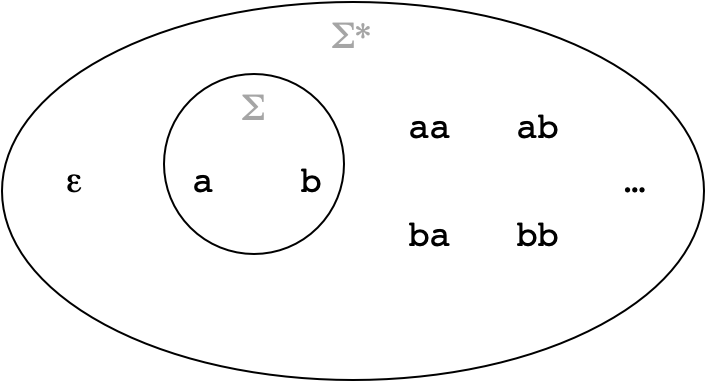

**Question.** (This question and all questions below are not for credit; they will be discussed in class.) True or false:
- $\Sigma \subseteq \Sigma^\ast$
- $\varepsilon \in \Sigma$
- $\varepsilon \in \Sigma^\ast$
- $\texttt{a} = \texttt{aa}$
- $\texttt{ab} = \texttt{ba}$

If $w$ is a string, we write $w_i$ for the $i$-th symbol of $w$ and $|w|$ for the length of $w$. If we ever have to number some strings, we'll write them as $w^{(1)}, w^{(2)},$ etc. The parentheses are there to make it clear that the numbers aren't exponents.

If $x$ and $y$ are strings, we write $xy$ (or occasionally $x \circ y$) for the *concatenation* of $u$ and $v$. Also, we write $w^2 = ww$, $w^3 = www$, etc. Concatenation is associative: $(xy)z = x(yz) = xyz$. And concatenating the empty string does nothing: $w \varepsilon = \varepsilon w = w$.

We say that $x$ is a *prefix* of $w$ if there is a string $y$ such that $w = xy$, and we say that $y$ is a *suffix* of $w$ if there is a string $x$ such that $w = xy$. We say that $y$ is a *substring* of $w$ if there are strings $x, z$ such that $w = xyz$.

**Question.**
- List all the prefixes of $\texttt{abc}$.
- What is $|\varepsilon\varepsilon\varepsilon|$?
- Give an example of when $xz$ isn't a substring of $xyz$. Give an example of when it is.

### Languages

Above, we said that we treat every computational problem as a yes/no question about strings. Another way of saying this is that we treat every computational problem as a set of strings, which we call a *language*. For example, the problem of testing whether a number is prime could be treated as the language $$\{w \in \{\texttt{0}, \ldots, \texttt{9}\}^\ast \mid \text{the number with decimal representation $w$ is prime}\}.$$

We've already met one language, $\Sigma^\ast$. We write $\emptyset$ (empty set) for the empty language.

**Question.** True or false?
\begin{align}
\varepsilon &\in \{\mathtt{abc}\} \\
\varepsilon &\in \Sigma^\ast \\
\{\texttt{abc}\} \cup \emptyset &= \{\texttt{abc}\} \\
\{\texttt{abc}\} \cup \{\varepsilon\} &= \{\texttt{abc}\}
\end{align}

**Question.** Is there such a thing (according to the definitions above) as 
- an infinite alphabet?
- an infinite string?
- an infinite language?

Operations on strings often induce analogous operations on languages. For example, if $w$ is a string, define $w^R$ to be the *reversal* of $w$, that is, the string with the same symbols as $w$ but in reverse order. Then there is a natural definition for the reversal of a language:
\begin{equation}
L^R = \{ w^R \mid w \in L \}.
\end{equation}

If $A$ and $B$ are languages,
\begin{align}
A \circ B = AB &= \{ xy \mid x \in A, y \in B\}.
\end{align}

For example, if $A = \{\texttt{c}, \texttt{d}\}$ and $B = \{\texttt{at}, \texttt{og}\}$, then $A \circ B = \{\texttt{cat}, \texttt{cog}, \texttt{dat}, \texttt{dog}\}$.

**Question.** According to the above definition, what is
- $\emptyset \circ \{\texttt{a}\}$
- $\{\varepsilon\} \circ \{\texttt{a}\}$

The $\ast$ operator that we saw above, known as the Kleene star, can be applied to any language. If $L$ is a language, then $L^\ast$ is the set of strings made out of zero or more strings in $L$. More formally:
\begin{equation}
L^\ast = \{ w^{(1)} \cdots w^{(k)} \mid k \geq 0, w^{(i)} \in L \}.
\end{equation}

For example, if $L = \{\texttt{aa}, \texttt{bb}\}$, then $L^\ast = \{\varepsilon, \texttt{aa}, \texttt{bb}, \texttt{aaaa}, \texttt{aabb}, \texttt{bbaa}, \texttt{bbbb}, \texttt{aaaaaa}, \ldots\}$.

**Question.** According to the above definition, what is 
- $\emptyset^\ast$?
- $\{\varepsilon\}^\ast$?

# Thursday

## Proofs

Most of the work that you will do in this class involves writing proofs. Because students in this class probably have a wide range of backgrounds in proof-writing, I'd like to say a little about it here.

<div class="alert alert-info"><b>Read</b> Sections 0.3–0.4, unless you feel very comfortable with writing proofs.</div>

My mantra is that writing proofs is actually a lot like writing programs (in fact, there is a [deep connection between the two](https://en.wikipedia.org/wiki/Curry–Howard_correspondence)). Much of my advice below applies equally well to programming, and I firmly believe that if you work to make your proofs better, you'll also become a better programmer.

### Before you write

Many students feel that when they are asked to write a proof, they feel that they don't know how to begin. As a running example, imagine that you need to prove: $L^\ast = \{\varepsilon\} \cup L \circ L^\ast$ for any language $L$.

1. **Understand the requirements.** What are the givens: the premise or "if" part of the statement to be proven, the definitions of all terms in the statement, and any facts that you're allowed to use? What is the conclusion or "then" part of the statement to be proven? You may want to rewrite the statement in a more explicit way. For example, you might rewrite the above statement as: If $L$ is a language over an alphabet $\Sigma$, then $L^\ast = \{\varepsilon\} \cup (L \circ L^\ast)$. You might also review the definitions of union ($\cup$), concatenation ($\circ$), and Kleene star ($\ast$).

2. **Develop an intuition.** Sometimes it's obvious, but more often, it is not obvious, or it may even feel obviously false! One way to convince yourself is to try examples. If, for example, the statement says "for all strings," try a few strings and see whether the thing to be proved is true for them. Choosing good examples (like choosing good test cases) means trying to find examples that falsify the thing to be proved. Seeing how such examples fail is a great way to develop an intuition for why the thing must be true.

3. **Divide and conquer.** Once you understand what you are given and what you must prove, and have some intuition for why one implies the other, you need to solidify this intuition into a rigorous proof. See if you can break it down into smaller, easier-to-prove pieces. It's okay, and often easier, to work backwards from the conclusion. In our example, we most likely want to break it down into $L^\ast \subseteq \{\varepsilon\} \cup L \circ L^\ast$ and $L^\ast \supseteq \{\varepsilon\} \cup L \circ L^\ast$.

### Paragraph proofs

If your high-school geometry class was like mine, you were taught to write "two-column" or "statement-reason" proofs. These consist of a sequence of logical statements, each accompanied by a reason. Each statement should be a consequence of zero or more *previous* statements or givens.

These are the "best" kind of proof because their logical structure is completely explicit. But a proof written this way could be hundreds of pages! You don't want to write that, and your TAs don't want to read that. Instead, most proofs are "paragraph proofs," that is, they are written in English and convince the reader that they *could* write a "statement-reason" proof if they really wanted to.

Here's an example proof for our example above: To show that $L^\ast = \{\varepsilon\} \cup L L^\ast$, we need to show that $L^\ast \subseteq \{\varepsilon\} \cup L L^\ast$ and $L^\ast \supseteq \{\varepsilon\} \cup L L^\ast$.

($\subseteq$) If $w \in L^\ast$, it can be written as $w^{(1)} \cdots w^{(k)}$, where $w^{(i)} \in L$, for some $k \geq 0$. If $k=0$, then $w = \varepsilon$. Otherwise, we have $w^{(1)} \in L$ and $w^{(2)} \cdots w^{(k)} \in L^\ast$, so $w \in L L^\ast$. Either way, we have $w \in \{\varepsilon\} \cup L L^\ast$.

($\supseteq$) If $w \in \{\varepsilon\} \cup L L^\ast$, then either $w = \varepsilon$ or $w \in L L^\ast$. If $w = \varepsilon$, then $w \in L^\ast$. If $w \in L L^\ast$, it can be written as $u v$ where $u \in L$ and $v \in L^\ast$. And $v$, in turn, can be written as $v^{(1)} \cdots v^{(k)}$ where $v^{(i)} \in L$. So $w$ can be written as $u v^{(1)} \cdots v^{(k)}$ where $u, v^{(i)} \in L$, so $w \in L^\ast$.

**Exercise** (this exercise and the ones below are not for credit). Suppose you are told, "Prove that if $y$ is a substring of $w$, then $y^R$ is a substring of $w^R$. You may use the fact that, for any string $u, v$, $(uv)^R = v^R u^R$." Below is a statement-reason proof of this fact; rewrite it as a paragraph proof.

| Statement                        | Reason                    |
|:---------------------------------|:--------------------------|
| 1. $y$ is a substring of $w$     | Given                     |
| 2. $w = xyz$ for some $x, z$     | Def. of substring         |
| 3. $w^R = (xyz)^R$               | Reflexivity, substitution |
| 4. $w^R = (yz)^R x^R$            | Fact given above          |
| 5. $w^R = z^R y^R x^R$           | Fact given above          |
| 6. $y^R$ is a substring of $w^R$ | Def. of substring         |

Paragraph proofs fundamentally have the same structure as statement-reason proofs, but are meant to be more natural to read and write. The next few sections explain the similarities and differences more.

### Order

A paragraph proof, like a statement-reason proof, should start from the givens and reason to the conclusion. It shouldn't start with the conclusion and reason backwards to the givens; still less should it assume the conclusion and reason in a circle back to the conclusion.

However, just as it's good programming practice to preface a function with a comment that says what the function will do, it's also good proof-writing to sometimes preface a piece of your proof with a "comment" stating what it will prove. Be sure to clearly distinguish these "comments" with verbiage like "we need to show..." so that your reader doesn't think you've skipped a bunch of steps.

In our example proof above, we start with two such "comments," introduced by "to show that..." and "we need to show...". I was lazy and didn't bother to restate them at the end of the proof.

**Exercise**. Look at the proof of Theorem 0.20 and number the statements in logical order. If two statements are equivalent, give them the same number. 

### Generality

If you have to prove a statement "There exists X such that Y," then it's fine to come up with an example X and prove that it makes Y true; similarly, if you have to *disprove* a statement "For all X, Y," then it's fine to come up with a counterexample X and prove that it makes Y false.

But if you have to prove "For all X, Y," although it may be very helpful to think about examples for X (as we encouraged you to do above), examples don't constitute proofs. An example might sometimes be helpful to make a general statement more clear, but I'd encourage you to try to make the general statement clear on its own.

### Detail

A statement-reason proof leaves no gaps in reasoning, but a paragraph proof leaves out details for the sake of brevity and clarity. How much detail? Just as pseudocode should have enough detail that someone else could implement it, a paragraph proof should have enough detail that someone (one of your classmates) can be convinced that a statement-reason proof could be written. But this rule is admittedly difficult to put in to practice. Here are a few examples.

There are places in the example proof above where more detail could be given, but isn't expected. For example, it uses the fact that if $w \in A \cup B$, then $w \in A$ or $w \in B$. In principle, you might need to prove this, but we don't expect it because set theory isn't the focus of this class.

Another missing detail is in the statement "If $w = \varepsilon$, then $w \in L^\ast$." In my opinion, this is fine, but since this is a fact about formal languages, which *is* the focus of this class, it would also be okay to add more justification: "If $w = \varepsilon$, then $w \in L^\ast$, because $\varepsilon$ is of the form $w^{(1)} \cdots w^{(k)}$ where $k=0$."

On the other hand, if the other case just said, "If $w \in LL^\ast$, then obviously $w \in L^\ast$," that would be too big of a jump for the first homework, where our focus is on strings and languages and writing good proofs. (It would be fine in later homeworks, after our focus has moved on to other topics.)

If you're in doubt about how much detail to include, ask a TA or me, and if you ever lose points for omitting a detail that you thought was obvious, feel free to ask me to reconsider it.